# Aula 1

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot
import numpy as np
from statsmodels.tsa.stattools import ccf

In [10]:
mlt.rcParams['font.size'] = 18
mlt.rcParams['figure.figsize'] = (16,8)
sns.set_style('darkgrid')

In [11]:
def plota_linha(x, y, dados, title='', subtitle='', xlabel='', ylabel='', ax=None, title_loc='left', **kwargs):
    
    if ax==None:
        fig, ax = plt.subplots()
    plt.sca(ax)
    sns.lineplot(x=x, y=y, data=dados, **kwargs)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    plt.title(title + '\n', fontsize=25, loc=title_loc, color='black')
    plt.text(0,1.03, subtitle, color='gray', transform=ax.transAxes, fontsize=15)
    return ax

In [12]:
def plota_barra(x, y, dados, title='', subtitle='', xlabel='', ylabel='', ax=None, title_loc='left', **kwargs):
    
    if ax==None:
        fig, ax = plt.subplots()
    plt.sca(ax)
    sns.barplot(x=x, y=y, data=dados, **kwargs)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    plt.title(title + '\n', fontsize=25, loc=title_loc, color='black')
    plt.text(0,1.03, subtitle, color='gray', transform=ax.transAxes, fontsize=15)
    return ax

In [13]:
url = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'
dados = pd.read_csv(url, compression='zip', sep=';')

In [14]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [15]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

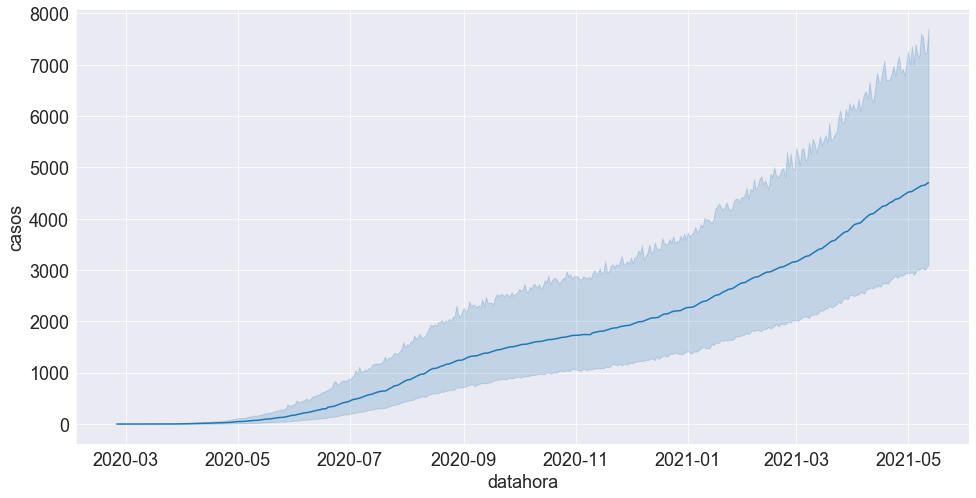

In [16]:
sns.lineplot(x='datahora', y='casos', data=dados)

In [17]:
dados_sp = dados.query('nome_munic == "São Paulo"')

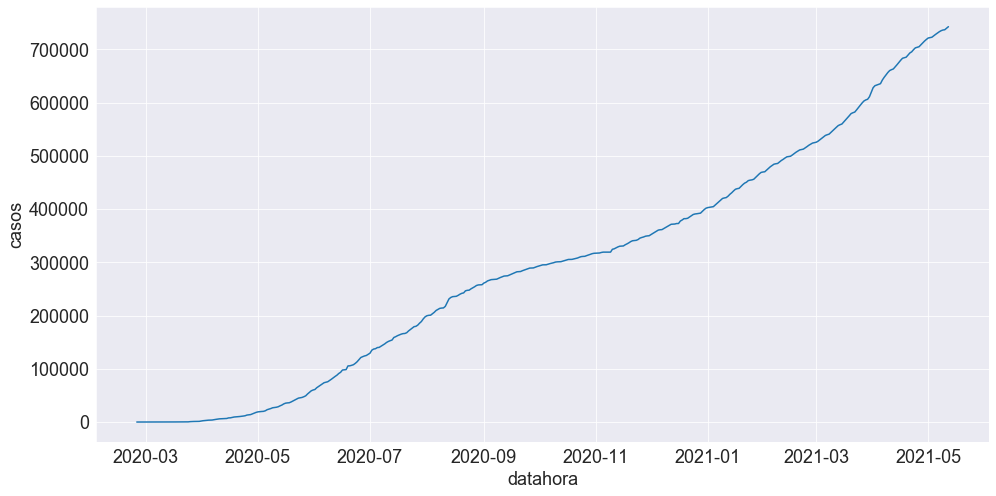

In [18]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.show()

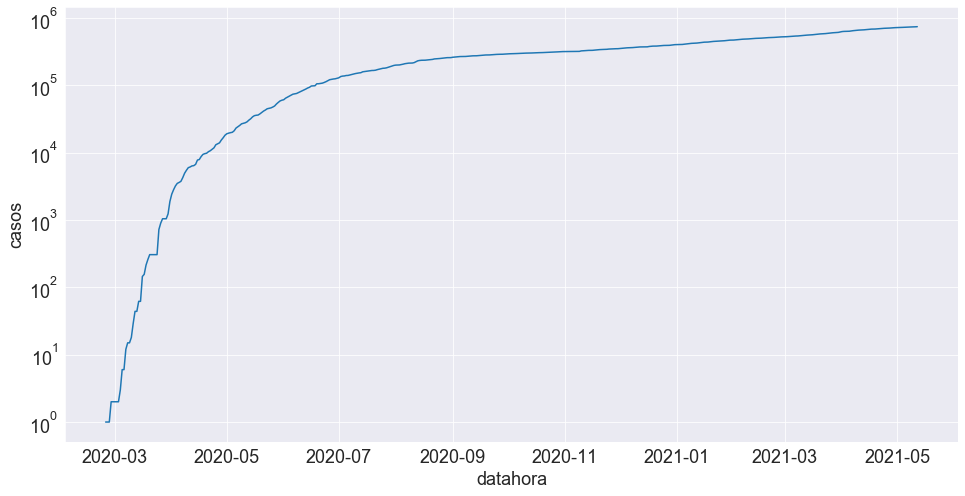

In [19]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.yscale('log')
plt.show()

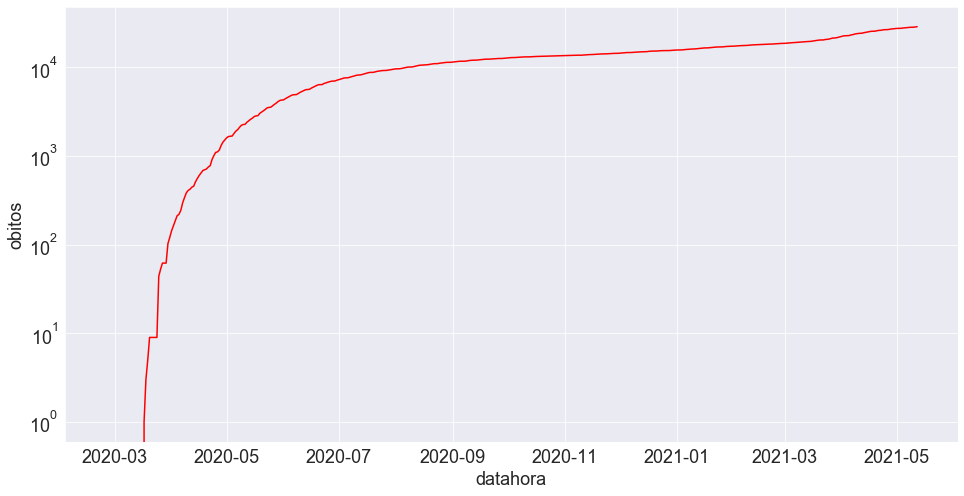

In [20]:
sns.lineplot(x='datahora', y='obitos', data=dados_sp, color='red')
plt.yscale('log')
plt.show()

# Filtrar a base de dados usando outra função

In [21]:
dados.loc[dados['nome_munic'] == 'São Paulo']

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19


# Fazer filtro por outra cidade

In [22]:
dados_camp_jordao = dados.loc[dados['nome_munic'] == 'Campos do Jordão']
dados_camp_jordao.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
110,Campos do Jordão,3509700,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",9
755,Campos do Jordão,3509700,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",9
1400,Campos do Jordão,3509700,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",9
2045,Campos do Jordão,3509700,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",9
2690,Campos do Jordão,3509700,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",9
3335,Campos do Jordão,3509700,1,3,2020-03-01,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",10
3980,Campos do Jordão,3509700,2,3,2020-03-02,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",10
4625,Campos do Jordão,3509700,3,3,2020-03-03,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",10
5270,Campos do Jordão,3509700,4,3,2020-03-04,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",10
5915,Campos do Jordão,3509700,5,3,2020-03-05,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,50118,6425,29052,0,8.0,"-22,7296","-45,5833",10


## Desafio 01: Um notebook sem warnings

In [23]:
import warnings
warnings.filterwarnings("ignore")

## Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos <br> Desafio 03: Fazer melhorias nos gráficos.

In [24]:
dados_sp['taxa_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

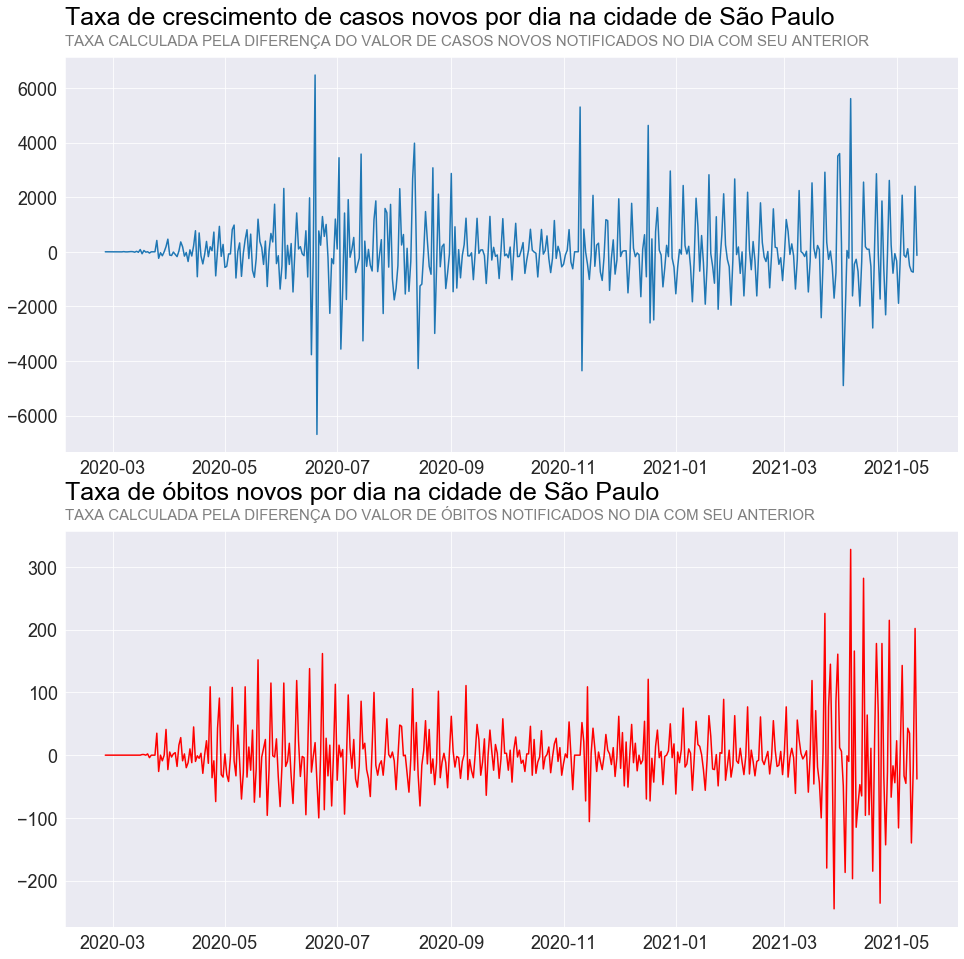

In [25]:
fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_linha('datahora', 'taxa_crescimento_casos', dados_sp, 'Taxa de crescimento de casos novos por dia na cidade de São Paulo', 'TAXA CALCULADA PELA DIFERENÇA DO VALOR DE CASOS NOVOS NOTIFICADOS NO DIA COM SEU ANTERIOR',ax=ax[0])
plota_linha('datahora', 'taxa_crescimento_obitos', dados_sp, 'Taxa de óbitos novos por dia na cidade de São Paulo', 'TAXA CALCULADA PELA DIFERENÇA DO VALOR DE ÓBITOS NOTIFICADOS NO DIA COM SEU ANTERIOR',ax=ax[1], color='red')
plt.show()

In [26]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(7, center=False).mean()

Para decidir o que é um pico utilizarei três fatores, se o valor é maior que a média móvel caculada de 7 dias, se o valor anterior é menor que o valor atual e se o valor seguinte é menor que o valor atual, obedecendo esses três fatores considerarei um pico.

In [27]:
def ehpico(dados, variavel):
    
    bool_pico = []
    dados.index = range(0,len(dados))
    for index, valor in dados[f'{variavel}_novos'].items():
        if index != 0 and index != len(dados)-1:
            if dados[f'{variavel}_novos'][index+1] < valor and dados[f'{variavel}_novos'][index-1] < valor:
                bool_pico.append(True)
            else:
                bool_pico.append(False)
        else:
            bool_pico.append(False)
            
    dados = dados[bool_pico]
    dados = dados[(dados[f'{variavel}_novos'] > dados[f'media_movel_{variavel}'])]
    
    return dados

Para conseguirmos visualizar os dados de casos e óbitos no mesmo gráfico, farei uma reexpressão dos dados de casos novos, dividindo cada valor por 10, expressando assim como dezenas.

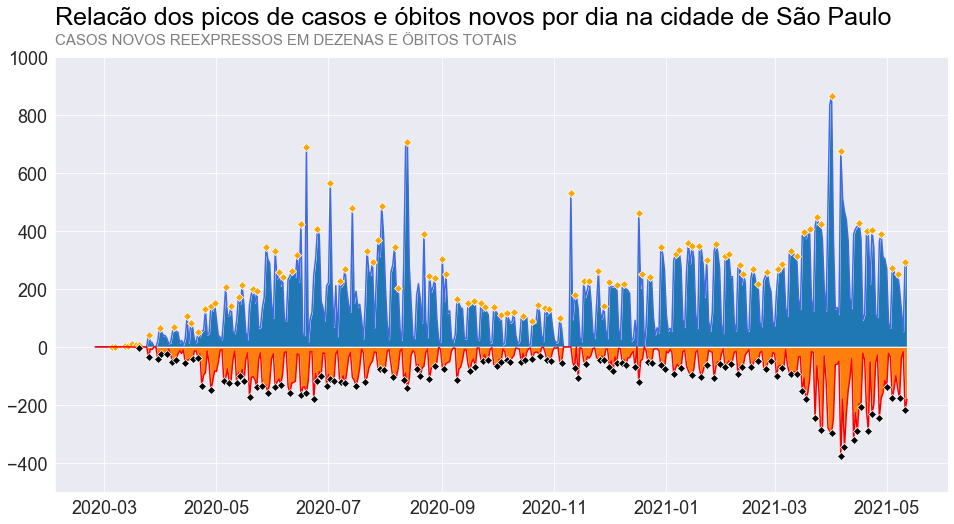

In [28]:
fig, ax = plt.subplots()

plota_linha('datahora', dados_sp['casos_novos']/10, dados_sp, color='royalblue',ax=ax)
plota_linha('datahora', ehpico(dados_sp,'casos')['casos_novos']/10,  ehpico(dados_sp,'casos'),ax=ax, color='orange', linewidth=0, marker='D', markersize=5)
plt.fill_between(dados_sp.datahora.values,dados_sp.casos_novos.values/10)

plota_linha('datahora', -1*dados_sp['obitos_novos'], dados_sp,ax=ax, color='red')
plota_linha('datahora', -1*ehpico(dados_sp,'obitos')['obitos_novos'], ehpico(dados_sp,'obitos') ,ax=ax, color='black', linewidth=0, marker='D', markersize=5, title='Relacão dos picos de casos e óbitos novos por dia na cidade de São Paulo', subtitle='CASOS NOVOS REEXPRESSOS EM DEZENAS E ÖBITOS TOTAIS')
plt.ylim(-500,1000)
plt.fill_between(dados_sp.datahora.values, -1*dados_sp.obitos_novos.values)
plt.show()

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras

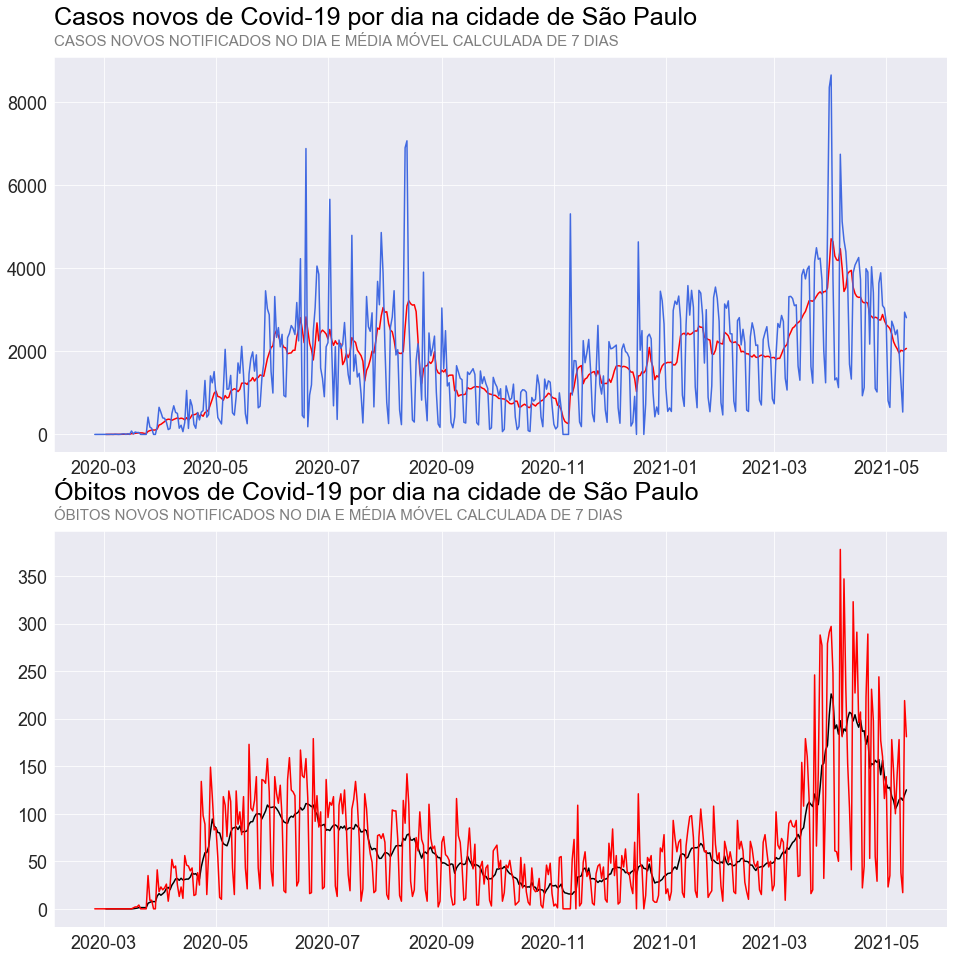

In [29]:
fig, ax = plt.subplots(2,1,figsize=(16,16))

plota_linha('datahora', 'media_movel_casos', dados_sp,ax=ax[0], color='red')
plota_linha('datahora', 'casos_novos', dados_sp, 'Casos novos de Covid-19 por dia na cidade de São Paulo', 'CASOS NOVOS NOTIFICADOS NO DIA E MÉDIA MÓVEL CALCULADA DE 7 DIAS',ax=ax[0], color='royalblue')
plota_linha('datahora', 'media_movel_obitos', dados_sp, ax=ax[1], color='black')
plota_linha('datahora', 'obitos_novos', dados_sp, 'Óbitos novos de Covid-19 por dia na cidade de São Paulo', 'ÓBITOS NOVOS NOTIFICADOS NO DIA E MÉDIA MÓVEL CALCULADA DE 7 DIAS',ax=ax[1], color='red')

In [30]:
dados_sp['ano'] = dados_sp['datahora'].dt.year
dados_sp['mes'] = dados_sp['datahora'].dt.month
dados_sp_2021 = dados_sp.query('ano == 2021')

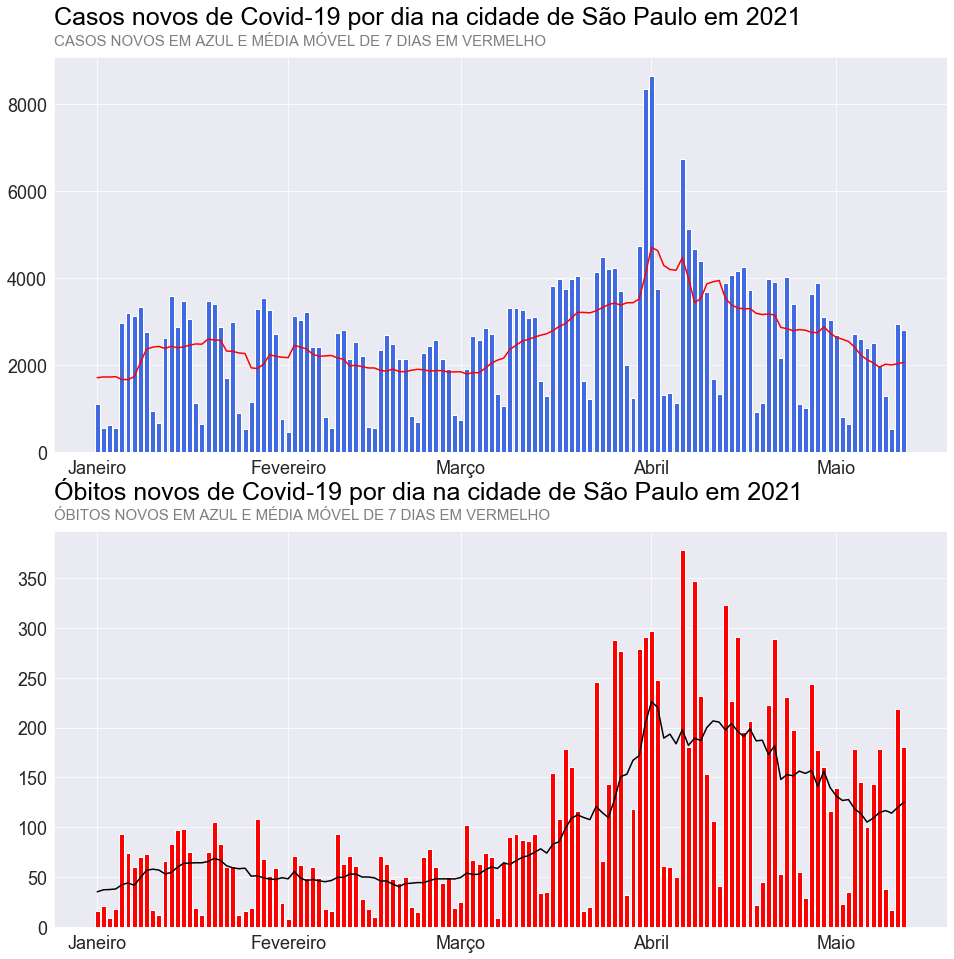

In [31]:
fig, ax = plt.subplots(2,1, figsize=(16,16))
ax[0].bar(dados_sp_2021['datahora'], dados_sp_2021['casos_novos'], color='royalblue')
ax[0].plot(dados_sp_2021['datahora'], dados_sp_2021['media_movel_casos'], color='red')
plt.sca(ax[0])
plt.xticks(pd.date_range('2021-01-01', '2021-05-01', freq='MS'),['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'])
plt.title('Casos novos de Covid-19 por dia na cidade de São Paulo em 2021\n', fontsize=25, loc='left', color='black')
plt.text(0,1.03, 'CASOS NOVOS EM AZUL E MÉDIA MÓVEL DE 7 DIAS EM VERMELHO', color='gray', transform=ax[0].transAxes, fontsize=15)

ax[1].bar(dados_sp_2021['datahora'], dados_sp_2021['obitos_novos'], color='red')
ax[1].plot(dados_sp_2021['datahora'], dados_sp_2021['media_movel_obitos'], color='black')
plt.sca(ax[1])
plt.xticks(pd.date_range('2021-01-01', '2021-05-01', freq='MS'),['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'])
plt.title('Óbitos novos de Covid-19 por dia na cidade de São Paulo em 2021\n', fontsize=25, loc='left', color='black')
plt.text(0,1.03, 'ÓBITOS NOVOS EM AZUL E MÉDIA MÓVEL DE 7 DIAS EM VERMELHO', color='gray', transform=ax[1].transAxes, fontsize=15)

plt.show()

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico de correlação

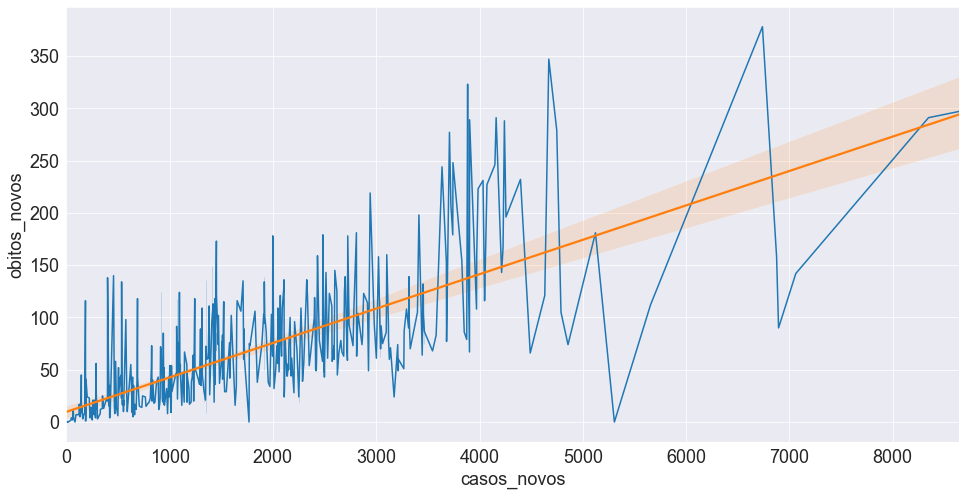

In [32]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)
sns.regplot(x='casos_novos', y='obitos_novos', data=dados_sp, scatter=False)

In [33]:
intervalos = [3, 5, 7, 10, 12, 14, 16, 21]
for intervalo in intervalos:
    dados_sp[f'obitos_{str(intervalo)}dias_depois'] = dados_sp['obitos_novos'].shift(-intervalo)

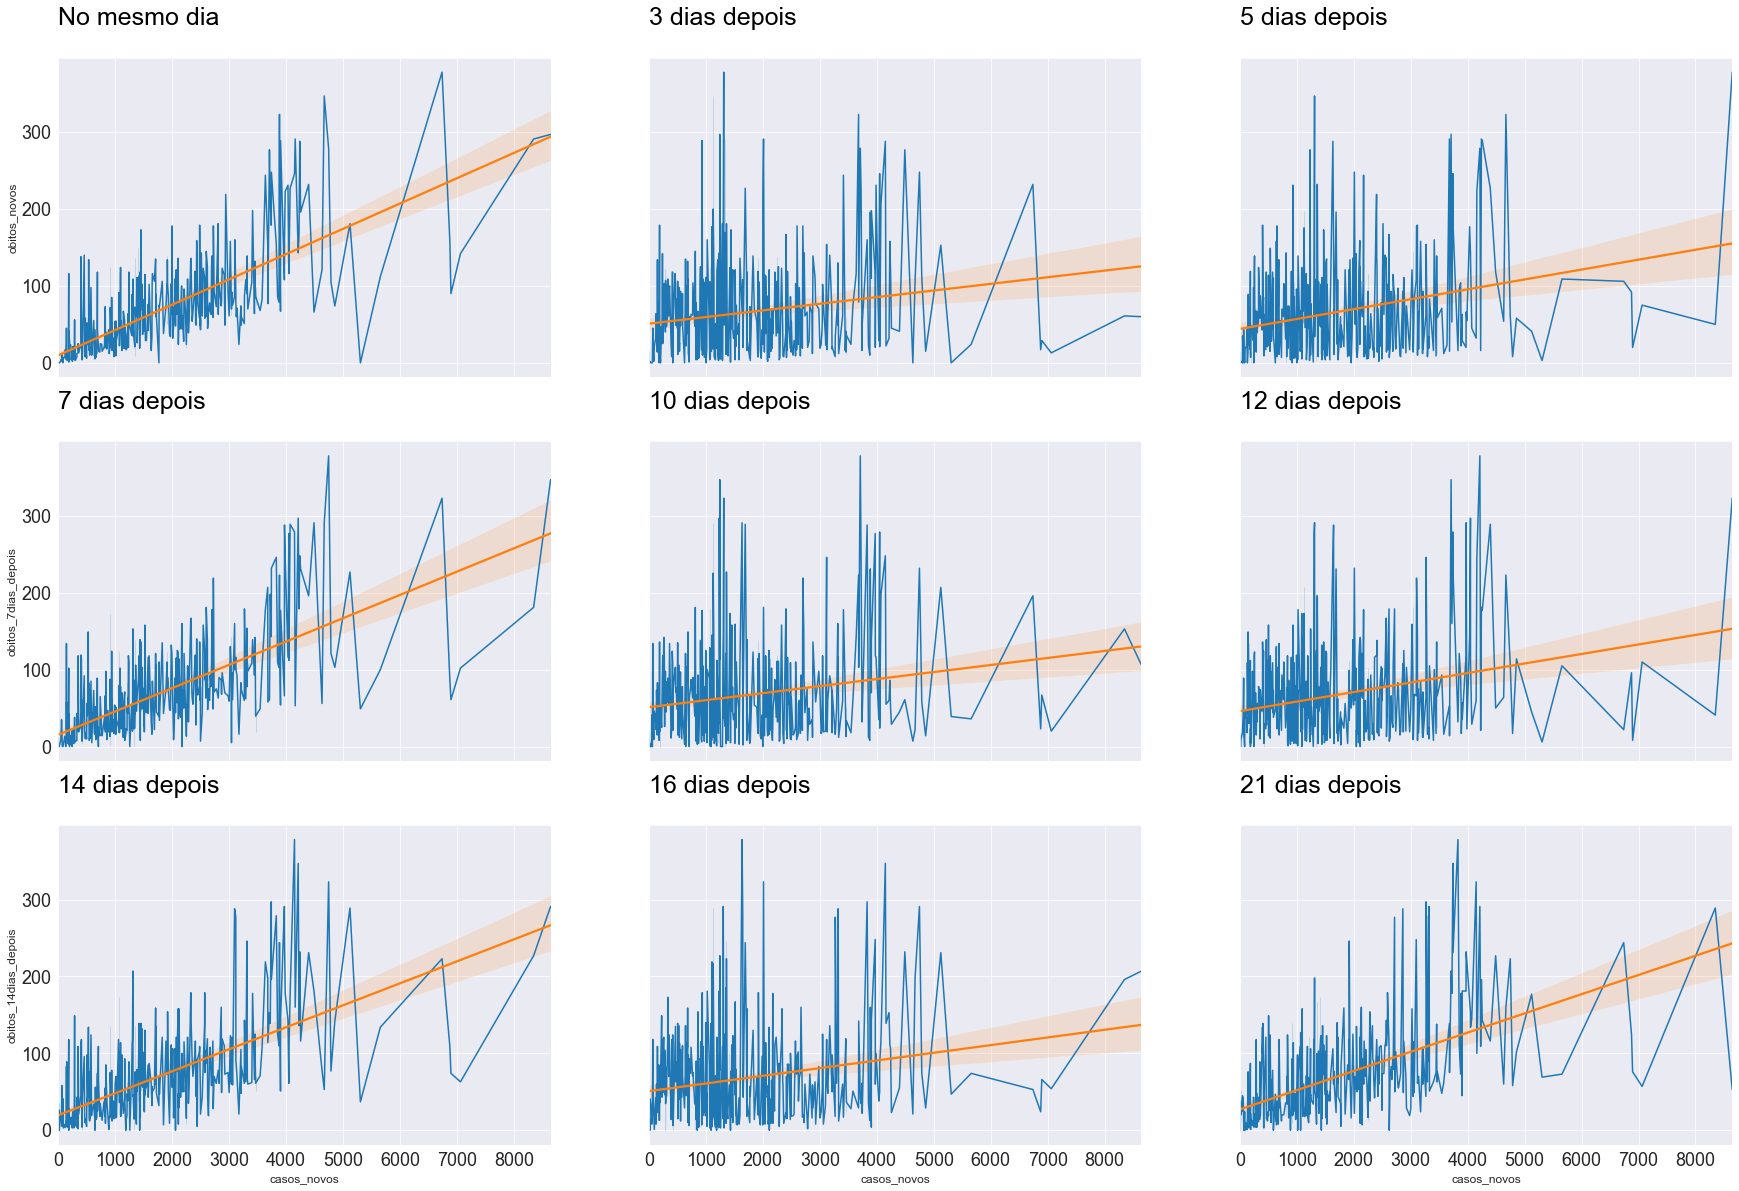

In [34]:
fig,ax = plt.subplots(3,3,figsize=(30,20), sharex=True, sharey=True)

plota_linha(x='casos_novos', y='obitos_novos', dados=dados_sp, title='No mesmo dia', ax=ax[0][0])
sns.regplot(x='casos_novos', y='obitos_novos', data=dados_sp, scatter=False)

i=0
j=1

for intervalo in intervalos:
    plota_linha(x='casos_novos', y=f'obitos_{str(intervalo)}dias_depois', dados=dados_sp, title=f'{intervalo} dias depois', ax=ax[i][j])
    sns.regplot(x='casos_novos', y=f'obitos_{str(intervalo)}dias_depois', data=dados_sp, scatter=False, ax=ax[i][j])
    if j == 2:
        j=0
        i+=1
    else:
        j+=1

# Desafio 06: Função de correlação cruzada dos óbitos e casos.

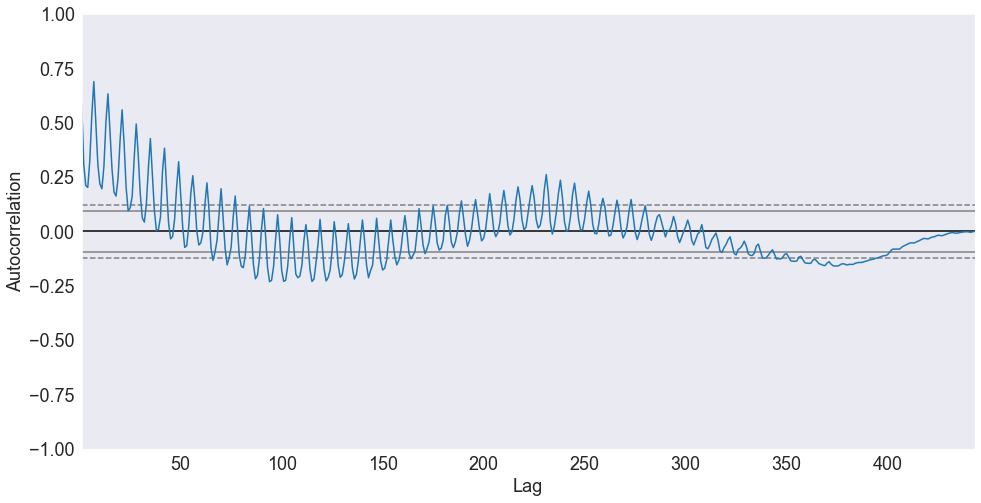

In [35]:
autocorrelation_plot(dados_sp['casos_novos'])

# Primeira tentativa

In [46]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

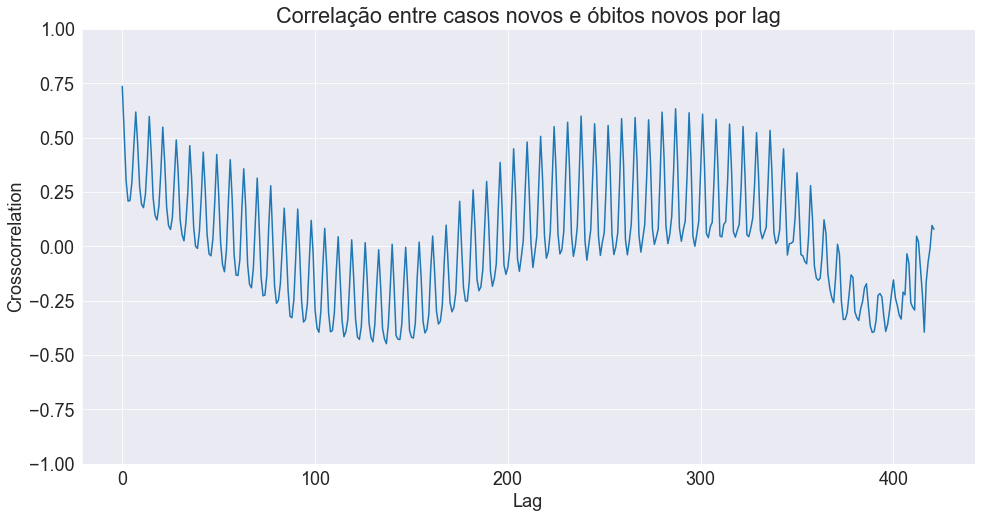

In [47]:
y_corr = [crosscorr(dados_sp['casos_novos'], dados_sp['obitos_novos'], lag) for lag in range(0,len(dados_sp))]
x_lag = range(0,len(dados_sp))
plt.plot(x_lag, y_corr)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag')
plt.xlabel('Lag')
plt.ylabel('Crosscorrelation')
plt.show()

# Jeito correto

In [50]:
ccf_output = ccf(dados_sp['casos_novos'], dados_sp['obitos_novos'], unbiased=False)
ccf_output

array([ 7.35532357e-01,  5.18634760e-01,  2.96344658e-01,  2.04628898e-01,
        2.07214651e-01,  2.90213920e-01,  4.51957258e-01,  6.00207545e-01,
        4.52122384e-01,  2.64682798e-01,  1.85317548e-01,  1.70062098e-01,
        2.28009030e-01,  3.76495285e-01,  5.66145251e-01,  4.05815122e-01,
        2.06193191e-01,  1.30927021e-01,  1.11117549e-01,  1.69294108e-01,
        3.09800477e-01,  4.97117047e-01,  3.43968943e-01,  1.56718170e-01,
        8.05545560e-02,  6.44069226e-02,  1.12441716e-01,  2.67837986e-01,
        4.10046643e-01,  2.78378225e-01,  9.19307475e-02,  3.60045975e-02,
        1.25868697e-02,  8.07235094e-02,  1.89454567e-01,  3.46591589e-01,
        2.24154286e-01,  5.41705248e-02, -1.30472999e-02, -2.02981596e-02,
        3.57795815e-02,  1.50493061e-01,  2.84268753e-01,  1.60350917e-01,
        1.74473574e-02, -4.18339503e-02, -4.77872765e-02,  7.53243770e-04,
        1.04386702e-01,  2.32021345e-01,  1.21010713e-01, -1.48623916e-02,
       -7.44126166e-02, -

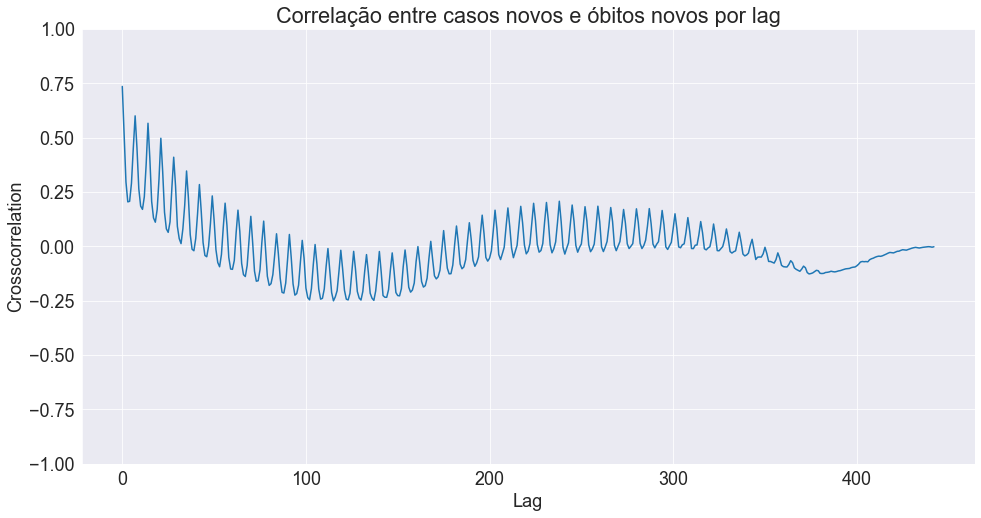

In [51]:
x_lag = range(0,len(dados_sp))
plt.plot(x_lag, ccf_output)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag')
plt.xlabel('Lag')
plt.ylabel('Crosscorrelation')
plt.show()

In [38]:
dados_sp.set_index(dados_sp.columns[0]).to_csv('dados/dados_covid_sp')

# Desafio 07: Estudar outros municípios

In [39]:
dados_sb= dados.loc[dados['nome_munic'] == 'São Bernardo do Campo']

In [40]:
dados_sb['ano'] = dados_sb['datahora'].dt.year
dados_sb['mes'] = dados_sb['datahora'].dt.month
dados_sb_2021 = dados_sb.query('ano == 2021')

In [41]:
dados_sb['media_movel_casos'] = dados_sb['casos_novos'].rolling(7, center=False).mean()
dados_sb['media_movel_obitos'] = dados_sb['obitos_novos'].rolling(7, center=False).mean()

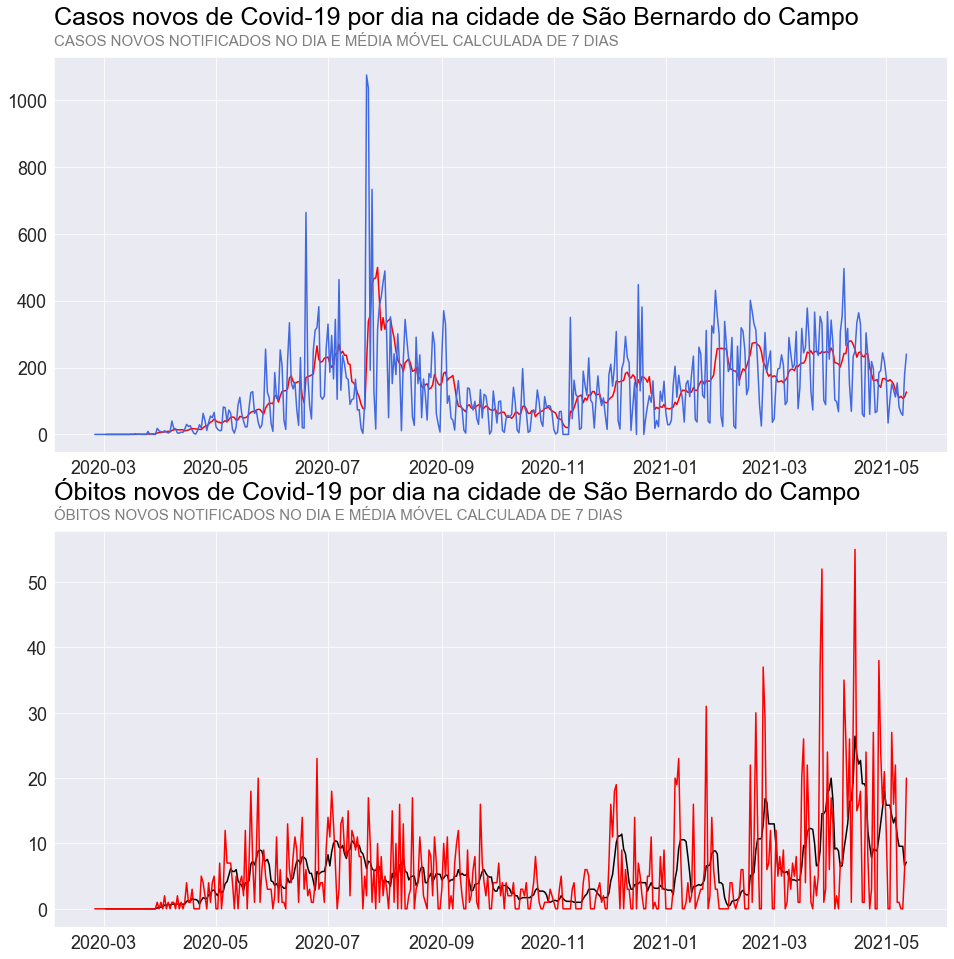

In [42]:
fig, ax = plt.subplots(2,1,figsize=(16,16))

plota_linha('datahora', 'media_movel_casos', dados_sb,ax=ax[0], color='red')
plota_linha('datahora', 'casos_novos', dados_sb, 'Casos novos de Covid-19 por dia na cidade de São Bernardo do Campo', 'CASOS NOVOS NOTIFICADOS NO DIA E MÉDIA MÓVEL CALCULADA DE 7 DIAS',ax=ax[0], color='royalblue')
plota_linha('datahora', 'media_movel_obitos', dados_sb, ax=ax[1], color='black')
plota_linha('datahora', 'obitos_novos', dados_sb, 'Óbitos novos de Covid-19 por dia na cidade de São Bernardo do Campo', 'ÓBITOS NOVOS NOTIFICADOS NO DIA E MÉDIA MÓVEL CALCULADA DE 7 DIAS',ax=ax[1], color='red')
plt.show()

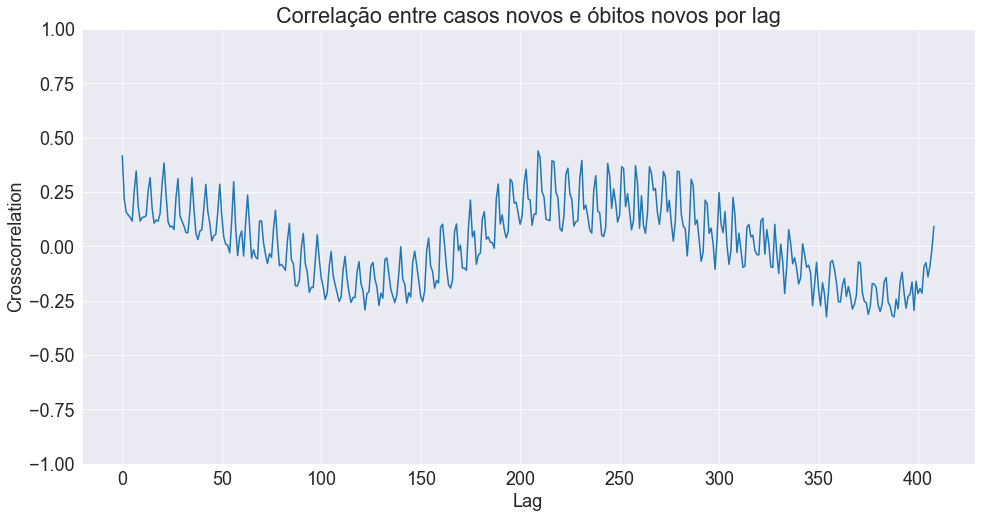

In [43]:
y_corr = [crosscorr(dados_sb['casos_novos'], dados_sb['obitos_novos'], lag) for lag in range(0,len(dados_sb))]
x_lag = range(0,len(dados_sb))
plt.plot(x_lag, y_corr)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag')
plt.xlabel('Lag')
plt.ylabel('Crosscorrelation')
plt.show()

In [44]:
intervalos = [3, 5, 7, 10, 12, 14, 16, 21]
for intervalo in intervalos:
    dados_sb[f'obitos_{str(intervalo)}dias_depois'] = dados_sb['obitos_novos'].shift(-intervalo)

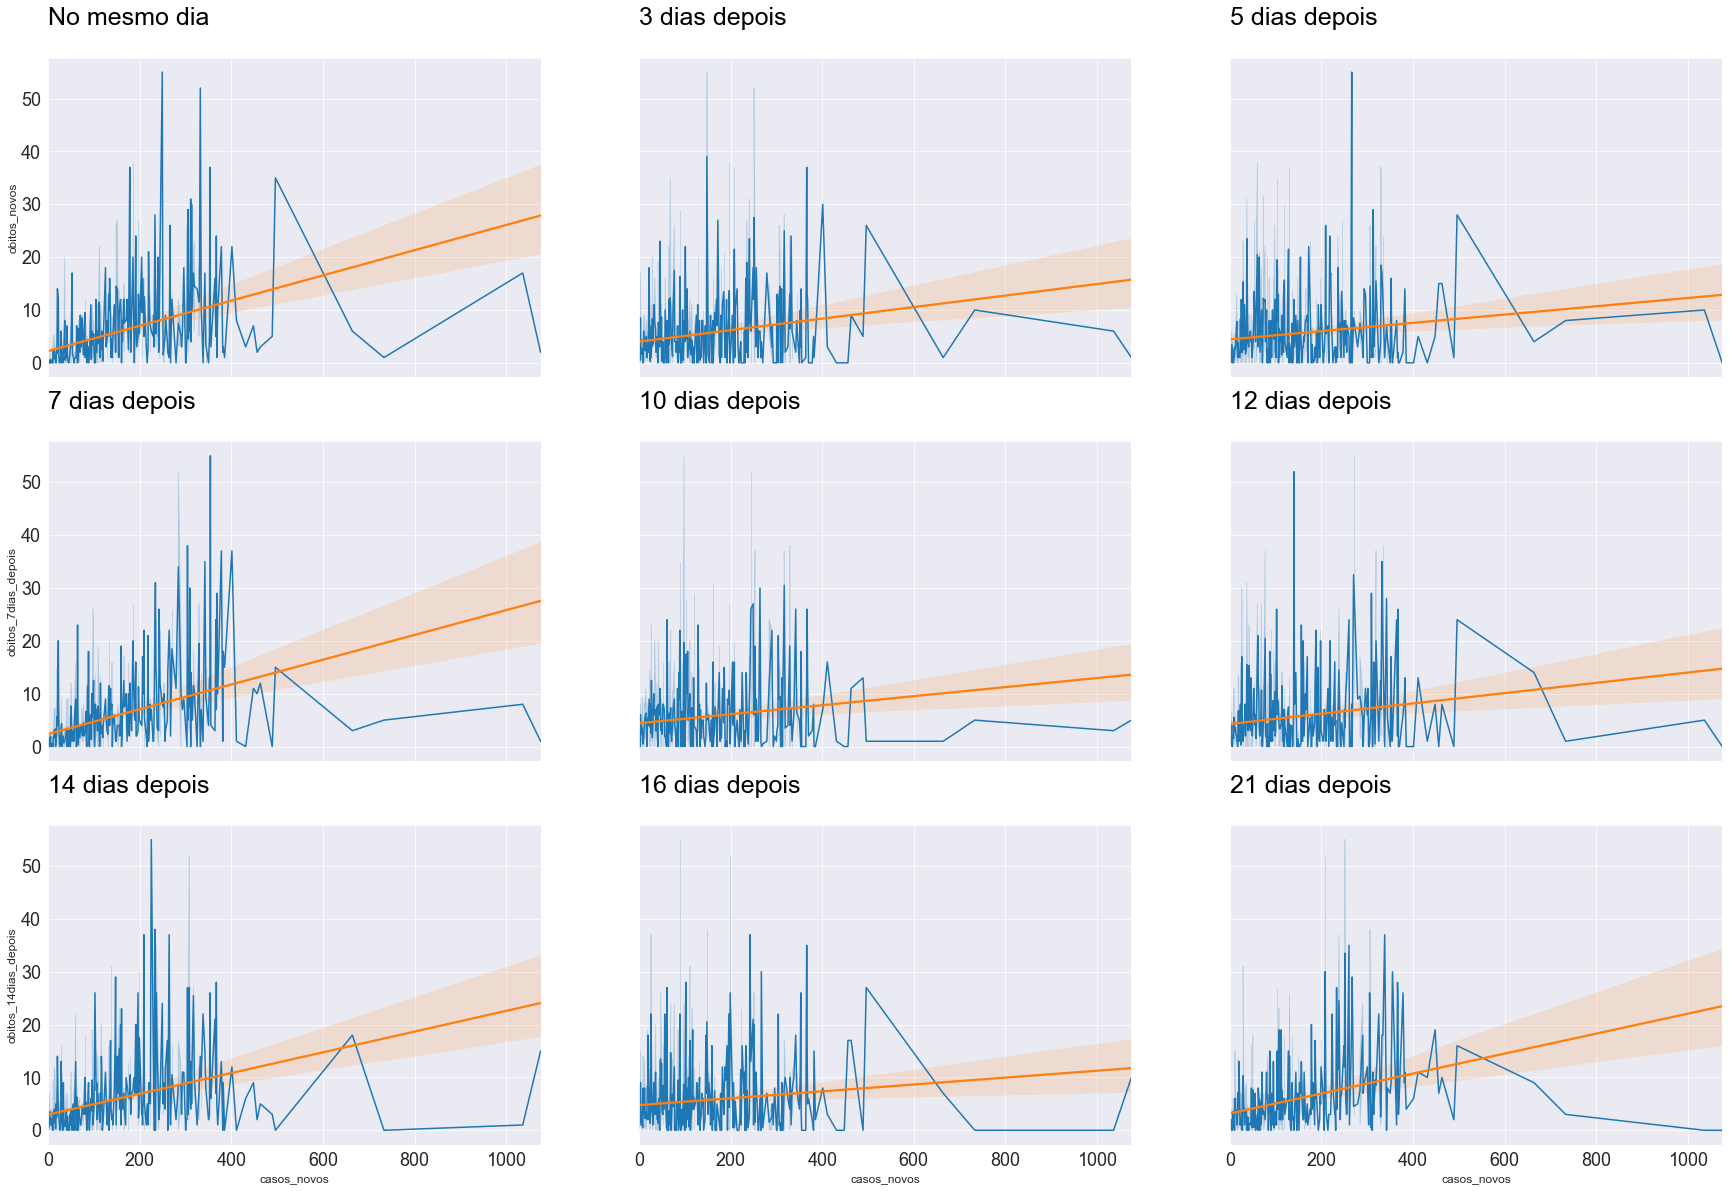

In [45]:
fig,ax = plt.subplots(3,3,figsize=(30,20), sharex=True, sharey=True)

plota_linha(x='casos_novos', y='obitos_novos', dados=dados_sb, title='No mesmo dia', ax=ax[0][0])
sns.regplot(x='casos_novos', y='obitos_novos', data=dados_sb, scatter=False)

i=0
j=1

for intervalo in intervalos:
    plota_linha(x='casos_novos', y=f'obitos_{str(intervalo)}dias_depois', dados=dados_sb, title=f'{intervalo} dias depois', ax=ax[i][j])
    sns.regplot(x='casos_novos', y=f'obitos_{str(intervalo)}dias_depois', data=dados_sb, scatter=False, ax=ax[i][j])
    if j == 2:
        j=0
        i+=1
    else:
        j+=1